<a href="https://www.kaggle.com/code/csarpereirogarca/breast-cancer-detection-using-cnn-1babff?scriptVersionId=174652564" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip install plotly
!pip install seaborn


In [2]:
import os
from os import listdir
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns

import cv2
from matplotlib.image import imread
import tensorflow.keras as keras
import tensorflow as tf

from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


import glob
import PIL
import random

random.seed(100)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Data Visualization

In [3]:
import pandas as pd
import glob



# Lista de nombres de archivo de imágenes
import os

# Ruta del directorio
path = '/kaggle/input/breast-histopathology-images/IDC_regular_ps50_idx5'

# Lista para almacenar los nombres de los archivos
breast_imgs = []

# Caminar por el directorio
for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith('.png'):
            breast_imgs.append(os.path.join(root, file))

# Crear listas vacías para almacenar la información
patient_numbers = []
cancer_status = []
x_coords = []
y_coords = []
file_names = []  # Lista para almacenar los nombres de archivo
file_paths = []  # Lista para almacenar las rutas de archivo completas

# Procesar cada nombre de archivo
for img in breast_imgs:
    # Extraer partes del nombre del archivo
    parts = img.split('/')
    filename = parts[-1]  # Obtener el nombre del archivo de la última parte
    patient_number = parts[-3]  # El número del paciente está en la tercer posición desde el final
    
    # Extraer la información de clase y coordenadas del nombre del archivo
    # Ejemplo de nombre de archivo: 10295_idx5_x1351_y1101_class0.png
    info = filename.rstrip('.png').split('_')
    x_coord = int(info[2][1:])
    y_coord = int(info[3][1:])
    status = int(info[4][-1])
    
    # Agregar información a las listas
    patient_numbers.append(patient_number)
    cancer_status.append(status)
    x_coords.append(x_coord)
    y_coords.append(y_coord)
    file_names.append(filename)  # Añadir el nombre del archivo a la lista
    file_paths.append(img)  # Añadir la ruta completa del archivo a la lista

# Crear el DataFrame
df = pd.DataFrame({
    'Patient_Number': patient_numbers,
    'Cancer_Status': cancer_status,
    'X_Coord': x_coords,
    'Y_Coord': y_coords,
    'File_Name': file_names,  # Añadir la columna de nombre de archivo al DataFrame
    'File_Path': file_paths   # Añadir la columna de ruta de archivo al DataFrame
})


# Ordenar el DataFrame
df.sort_values(by=['Patient_Number', 'X_Coord', 'Y_Coord'], inplace=True)

print(df.head())


      Patient_Number  Cancer_Status  X_Coord  Y_Coord  \
54094          10253              0      151     1551   
54220          10253              0      201     1551   
54075          10253              0      301     1651   
54392          10253              0      351     1301   
54237          10253              0      351     1651   

                              File_Name  \
54094  10253_idx5_x151_y1551_class0.png   
54220  10253_idx5_x201_y1551_class0.png   
54075  10253_idx5_x301_y1651_class0.png   
54392  10253_idx5_x351_y1301_class0.png   
54237  10253_idx5_x351_y1651_class0.png   

                                               File_Path  
54094  /kaggle/input/breast-histopathology-images/IDC...  
54220  /kaggle/input/breast-histopathology-images/IDC...  
54075  /kaggle/input/breast-histopathology-images/IDC...  
54392  /kaggle/input/breast-histopathology-images/IDC...  
54237  /kaggle/input/breast-histopathology-images/IDC...  


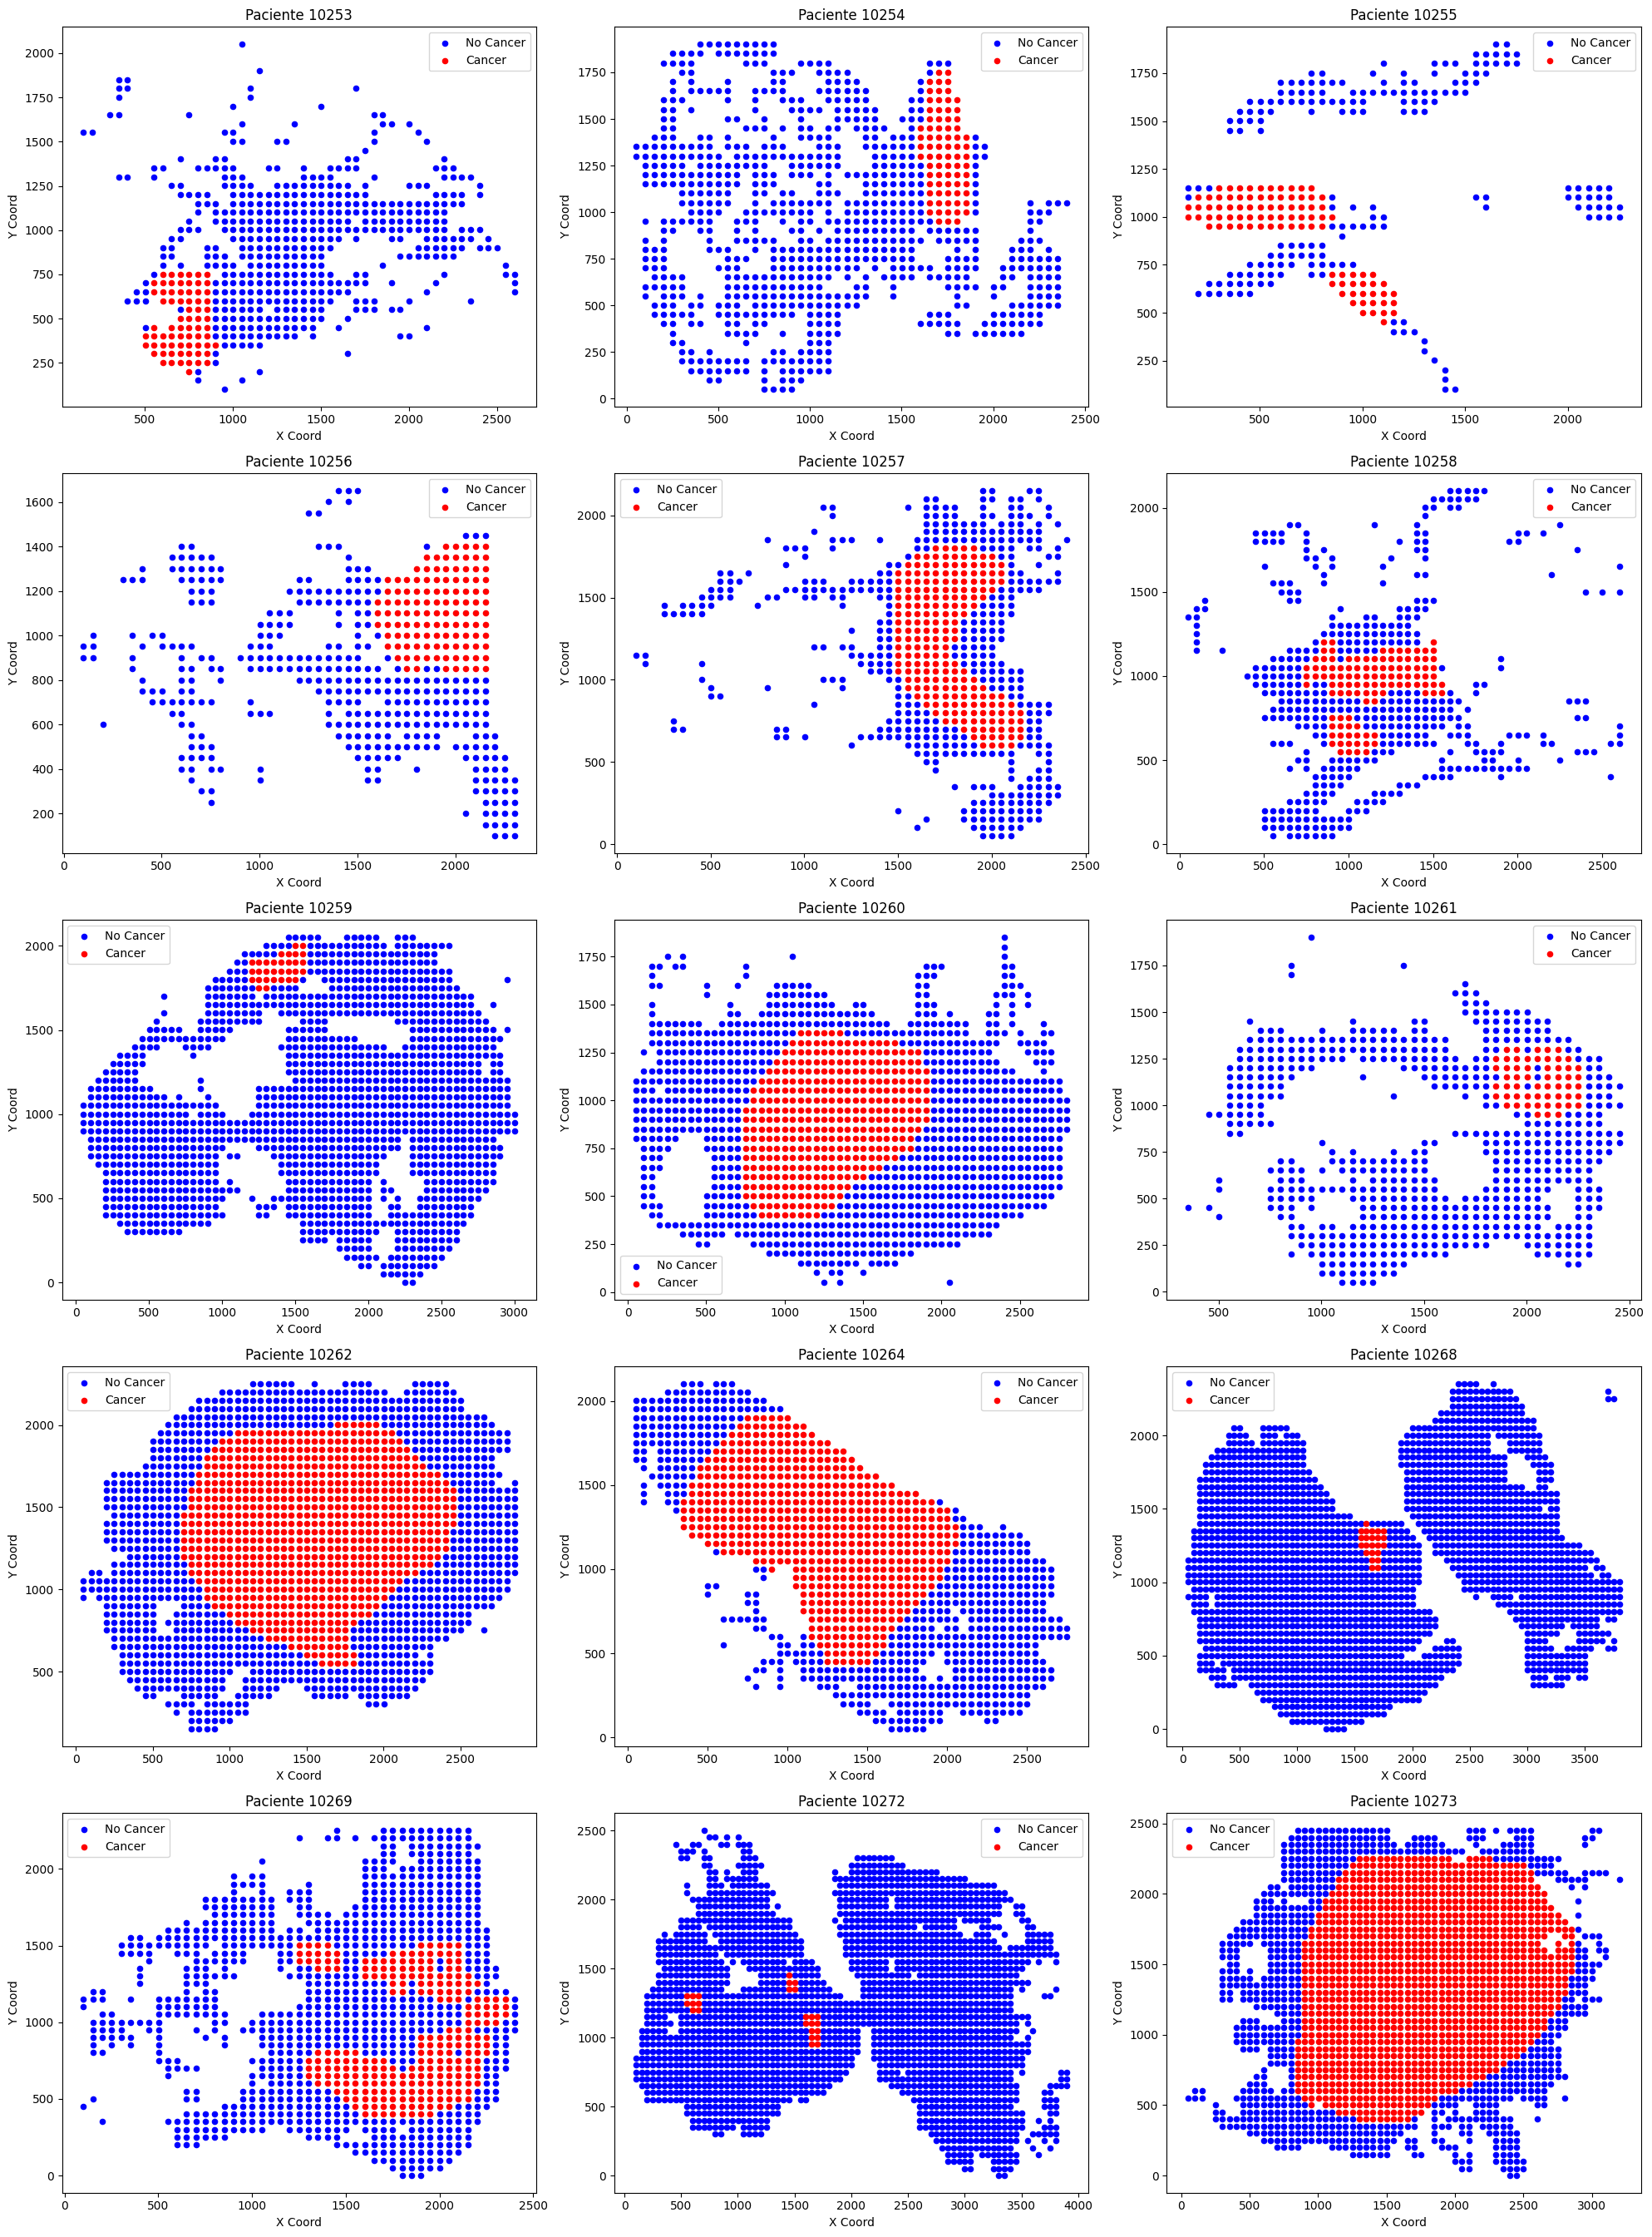

In [4]:
import matplotlib.pyplot as plt

# Obtener los IDs únicos de los pacientes
patient_ids = df['Patient_Number'].unique()

# Configurando la figura para visualizar múltiples subplots
fig, axs = plt.subplots(5, 3, figsize=(20, 27))  # Ajusta el número de subplots según tus necesidades

# Creando un loop para trazar los datos de cada paciente
for i in range(5):  # Ajusta estos rangos según el número de pacientes que desees visualizar
    for j in range(3):
        if 3 * i + j < len(patient_ids):  # Evitar índices fuera del rango
            patient_id = patient_ids[3 * i + j]
            # Filtrar el DataFrame para el paciente específico
            patient_df = df[df['Patient_Number'] == patient_id]
            
            # Graficar las coordenadas
            axs[i, j].scatter(patient_df[patient_df['Cancer_Status'] == 0]['X_Coord'], patient_df[patient_df['Cancer_Status'] == 0]['Y_Coord'], c='blue', label='No Cancer', s=20)
            axs[i, j].scatter(patient_df[patient_df['Cancer_Status'] == 1]['X_Coord'], patient_df[patient_df['Cancer_Status'] == 1]['Y_Coord'], c='red', label='Cancer', s=20)
            
            # Configurando títulos y etiquetas
            axs[i, j].set_title("Paciente " + str(patient_id))
            axs[i, j].set_xlabel("X Coord")
            axs[i, j].set_ylabel("Y Coord")
            axs[i, j].legend()

# Mejorar la distribución de los subplots
plt.tight_layout()
plt.show()


In [5]:
for imgname in breast_imgs[:5]:
    print(imgname)

/kaggle/input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x1351_y1101_class0.png
/kaggle/input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x1501_y501_class0.png
/kaggle/input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x1501_y1101_class0.png
/kaggle/input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x451_y901_class0.png
/kaggle/input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x801_y451_class0.png


In [6]:
import tensorflow as tf
import os
from sklearn.model_selection import train_test_split

# Assuming df is pre-sorted as required.
df['Full_Path'] = df['File_Path']

# Function to load images and coordinates
def load_image_and_coords_from_path(file_path, label, x_coord, y_coord):
    image = tf.io.read_file(file_path)
    image = tf.image.decode_png(image, channels=3)
    image = tf.image.resize(image, [50, 50])
    return (image, tf.cast(label, tf.float32), tf.cast(x_coord, tf.float32), tf.cast(y_coord, tf.float32))

# Create a TensorFlow dataset from the DataFrame
def create_dataset(df):
    
    path_ds = tf.data.Dataset.from_tensor_slices((
        df['Full_Path'].values,
        df['Cancer_Status'].values,
        df['X_Coord'].values,
        df['Y_Coord'].values
    ))
    # Use num_parallel_calls=None to ensure that the map operation is deterministic
    dataset = path_ds.map(load_image_and_coords_from_path)
    # Batch the dataset without shuffling
    return dataset.batch(128)

# Function to unpack features and labels
def unpack_features_labels(image, label, x_coord, y_coord):
    return (image, tf.stack([x_coord, y_coord], axis=1)), label

# Split the DataFrame into train, validation, and test sets
train_df, temp_df = train_test_split(df, test_size=0.15, random_state=42, stratify=df['Patient_Number'])
valid_df, test_df = train_test_split(temp_df, test_size=(0.05 / 0.15), random_state=42, stratify=temp_df['Patient_Number'])

# Create and unpack datasets ensuring they are ordered
train_dataset = create_dataset(train_df)
train_dataset = train_dataset.map(unpack_features_labels)

valid_dataset = create_dataset(valid_df)
valid_dataset = valid_dataset.map(unpack_features_labels)

test_dataset = create_dataset(test_df)
test_dataset = test_dataset.map(unpack_features_labels)



# Print out the coordinates from the first batch to verify order
for (images, coords), labels in train_dataset.take(1):
    x_coords, y_coords = tf.unstack(coords, axis=1)
    for i in range(tf.shape(labels)[0]):
        print(f'Image {i}: Label: {labels[i].numpy()}, X_Coord: {x_coords[i].numpy()}, Y_Coord: {y_coords[i].numpy()}')





Image 0: Label: 0.0, X_Coord: 2001.0, Y_Coord: 1201.0
Image 1: Label: 1.0, X_Coord: 1351.0, Y_Coord: 551.0
Image 2: Label: 1.0, X_Coord: 551.0, Y_Coord: 1251.0
Image 3: Label: 1.0, X_Coord: 1001.0, Y_Coord: 1451.0
Image 4: Label: 0.0, X_Coord: 301.0, Y_Coord: 1751.0
Image 5: Label: 0.0, X_Coord: 1451.0, Y_Coord: 1701.0
Image 6: Label: 0.0, X_Coord: 1001.0, Y_Coord: 551.0
Image 7: Label: 0.0, X_Coord: 1451.0, Y_Coord: 601.0
Image 8: Label: 1.0, X_Coord: 801.0, Y_Coord: 901.0
Image 9: Label: 1.0, X_Coord: 2401.0, Y_Coord: 701.0
Image 10: Label: 0.0, X_Coord: 2651.0, Y_Coord: 401.0
Image 11: Label: 1.0, X_Coord: 551.0, Y_Coord: 1551.0
Image 12: Label: 0.0, X_Coord: 1801.0, Y_Coord: 601.0
Image 13: Label: 0.0, X_Coord: 2301.0, Y_Coord: 851.0
Image 14: Label: 0.0, X_Coord: 251.0, Y_Coord: 1301.0
Image 15: Label: 1.0, X_Coord: 851.0, Y_Coord: 451.0
Image 16: Label: 1.0, X_Coord: 1951.0, Y_Coord: 551.0
Image 17: Label: 0.0, X_Coord: 551.0, Y_Coord: 1001.0
Image 18: Label: 1.0, X_Coord: 551.0,

Coordenadas y etiquetas de las imágenes en el patch:
(651, 251, 1, 'Original')
(701, 251, 1, 'Original')
(751, 251, 1, 'Original')
(801, 251, 1, 'Original')
(651, 301, 1, 'Original')
(701, 301, 1, 'Original')
(751, 301, 1, 'Original')
(801, 301, 1, 'Original')
(651, 351, 1, 'Original')
(701, 351, 1, 'Original')
(751, 351, 1, 'Original')
(801, 351, 1, 'Original')
(651, 401, 1, 'Original')
(701, 401, 1, 'Original')
(751, 401, 1, 'Original')
(801, 401, 1, 'Original')


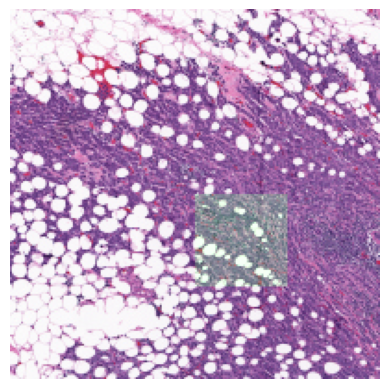

In [7]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def load_image(file_path):
    image = tf.io.read_file(file_path)
    image = tf.image.decode_png(image, channels=3)
    image = tf.image.resize(image, [50, 50])
    return image.numpy()

def get_surrounding_images_with_coords(df, center_idx):
    center_x = df.iloc[center_idx]['X_Coord']
    center_y = df.iloc[center_idx]['Y_Coord']
    
    # Definir coordenadas alrededor del centro, asegurándose que la imagen central esté en la posición 11
    patch_coords = [(x, y) for y in range(center_y - 1 * 50, center_y + 3 * 50, 50)
                    for x in range(center_x - 1 * 50, center_x + 3 * 50, 50)]
    
    image_patch = np.zeros((4 * 50, 4 * 50, 3), dtype=np.uint8)
    used_coords_labels = []
    
    for i, (x, y) in enumerate(patch_coords):
        row = i // 4
        col = i % 4
        image_df = df[(df['X_Coord'] == x) & (df['Y_Coord'] == y)]
        
        if image_df.empty:
            nearest_idx = ((df['X_Coord'] - x).abs() + (df['Y_Coord'] - y).abs()).argmin()
            nearest_image_df = df.iloc[nearest_idx]
            image = load_image(nearest_image_df['Full_Path'])
            
            # Aplicar transformaciones de espejo si necesario
            if nearest_image_df['X_Coord'] < center_x:
                image = np.fliplr(image)
            elif nearest_image_df['X_Coord'] > center_x:
                image = np.flipud(image)
            
            used_coords_labels.append((nearest_image_df['X_Coord'], nearest_image_df['Y_Coord'], nearest_image_df['Cancer_Status'], 'Espejo'))
        else:
            image = load_image(image_df.iloc[0]['Full_Path'])
            used_coords_labels.append((x, y, image_df.iloc[0]['Cancer_Status'], 'Original'))
        
        image_patch[row * 50:(row + 1) * 50, col * 50:(col + 1) * 50, :] = image
    
    # Añadir sombreado verde a la imagen central (posición 11, es decir fila 3, columna 3)
    green_mask = np.full((50, 50, 3), [0, 255, 0], dtype=np.uint8)
    image_patch[100:150, 100:150, :] = np.clip(image_patch[100:150, 100:150, :] + green_mask * 0.2, 0, 255)

    return image_patch, used_coords_labels

# Ejemplo de uso:
center_image_idx = 55
patch_image, patch_coords_labels = get_surrounding_images_with_coords(df, center_image_idx)

# Mostrar el patch y las coordenadas de las imágenes utilizadas
print("Coordenadas y etiquetas de las imágenes en el patch:")
for coord_label in patch_coords_labels:
    print(coord_label)

# Verificar el resultado
plt.imshow(patch_image)
plt.axis('off')
plt.show()


In [8]:
#rm -rf /kaggle/working/*

In [9]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd

def save_image(image_patch, patient_number, label, file_name):
    output_dir = f'/kaggle/working/{patient_number}/{label}'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    file_path = os.path.join(output_dir, file_name)
    image_patch = tf.convert_to_tensor(image_patch, dtype=tf.uint8)
    encoded_image = tf.image.encode_png(image_patch)
    tf.io.write_file(file_path, encoded_image)

def load_image(file_path):
    image = tf.io.read_file(file_path)
    image = tf.image.decode_png(image, channels=3)
    image = tf.image.resize(image, [50, 50])
    return image.numpy()

def create_image_patches(df):
    count=0
    # Agrupa por coordenadas para reducir la carga de búsqueda
    coord_group = df.groupby(['X_Coord', 'Y_Coord'])

    for idx, row in df.iterrows():
        center_x = row['X_Coord']
        center_y = row['Y_Coord']
        image_label = row['Cancer_Status']
        patient_number = row['Patient_Number']
        original_file_name = row['File_Name']

        patch_coords = [(x, y) for y in range(center_y - 1 * 50, center_y + 3 * 50, 50)
                        for x in range(center_x - 1 * 50, center_x + 3 * 50, 50)]
        
        image_patch = np.zeros((4 * 50, 4 * 50, 3), dtype=np.uint8)
        count = count + 1
        if count % 100000 == 0:
            print(f"Processed {count} images.")
            break

        for i, (x, y) in enumerate(patch_coords):
            if (x, y) in coord_group.groups:
                image_df = coord_group.get_group((x, y))
                if not image_df.empty:
                    image_path = image_df.iloc[0]['Full_Path']
                    image = load_image(image_path)
                    row = i // 4
                    col = i % 4
                    image_patch[row * 50:(row + 1) * 50, col * 50:(col + 1) * 50, :] = image

        save_image(image_patch, patient_number, str(image_label), original_file_name)

# Asegúrate de que df tiene las columnas correctas
create_image_patches(df)


Processed 100000 images.


In [10]:
import pandas as pd
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split



# Crear una copia del DataFrame y ajustar las rutas en la copia
df_copy = df.copy()
df_copy['File_Path'] = df_copy['File_Path'].str.replace(
    "/kaggle/input/breast-histopathology-images/IDC_regular_ps50_idx5", "/kaggle/working")

# Eliminar las filas cuyas carpetas de pacientes o archivos no existen
df_copy = df_copy[df_copy['File_Path'].apply(lambda x: os.path.exists(os.path.dirname(x)) and os.path.exists(x))]

# Dividir los datos en entrenamiento, validación y prueba
train_df, test_val_df = train_test_split(df_copy, test_size=0.2, stratify=df_copy['Patient_Number'], random_state=42)
test_df, val_df = train_test_split(test_val_df, test_size=0.5, stratify=test_val_df['Patient_Number'], random_state=42)

# Función para cargar y procesar las imágenes


def load_image_and_label(filepath, label):
    image = tf.io.read_file(filepath)
    image = tf.image.decode_png(image, channels=3)
    image = tf.image.resize(image, [224, 224])  # El tamaño esperado por VGG16 es 224x224
    label = tf.cast(label, tf.int32)  # Convierte la etiqueta a int32
    return image, label





def create_dataset(dataframe):
    labels = dataframe['Cancer_Status'].values
    file_paths = dataframe['File_Path'].values
    dataset = tf.data.Dataset.from_tensor_slices((file_paths, labels))
    dataset = dataset.map(load_image_and_label)
    dataset = dataset.batch(128)
    return dataset

# Crear los datasets
train_dataset = create_dataset(train_df)
val_dataset = create_dataset(val_df)
test_dataset = create_dataset(test_df)

# Ahora puedes usar `train_dataset`, `val_dataset` y `test_dataset` para entrenar tu modelo



Muestras y detalles del dataset de entrenamiento:


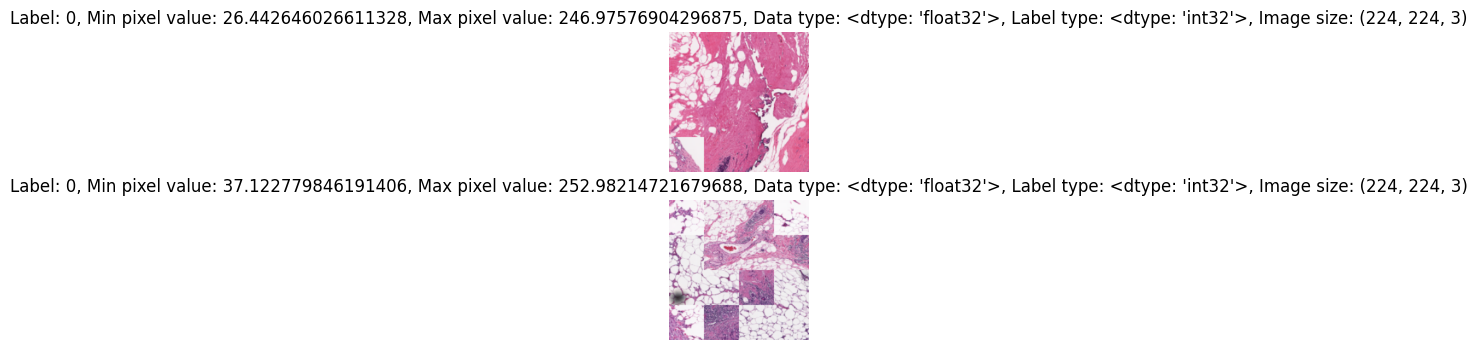

Muestras y detalles del dataset de validación:


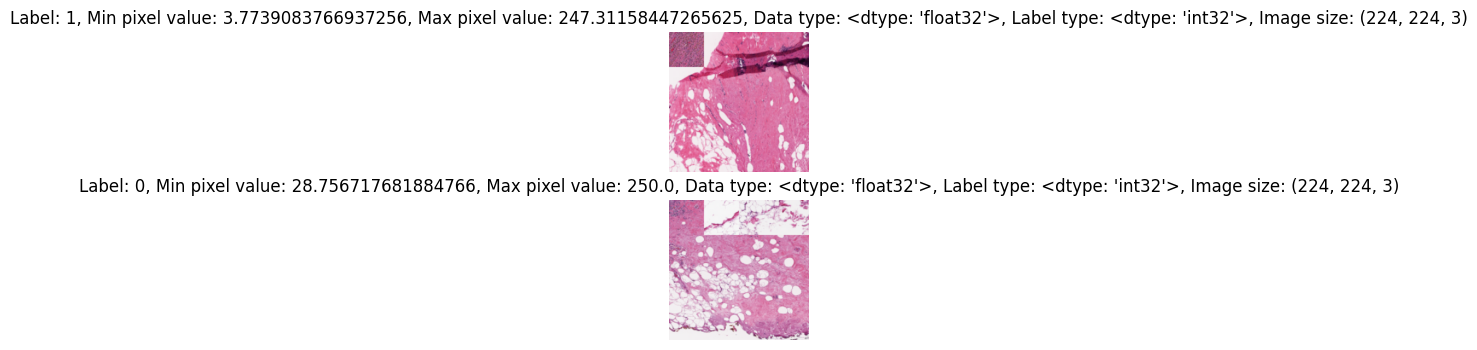

Muestras y detalles del dataset de prueba:


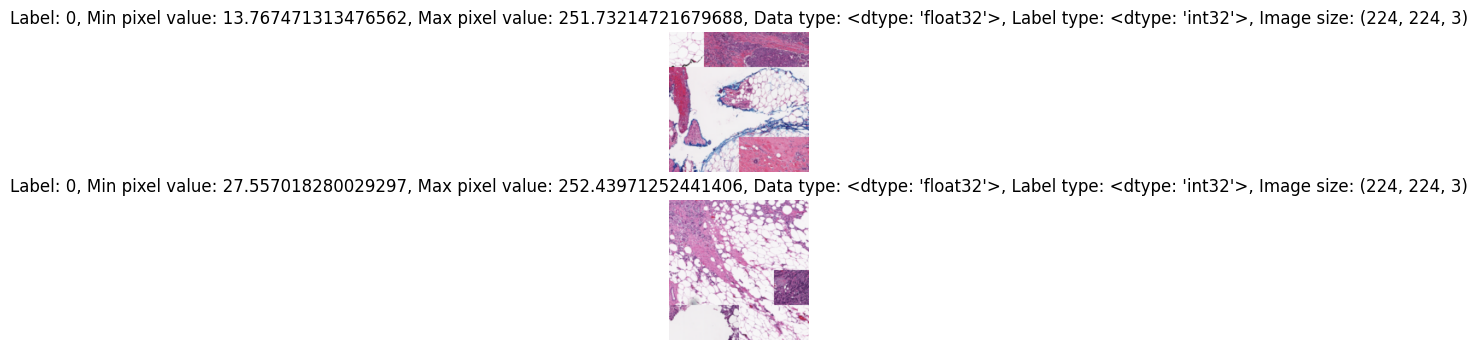

In [11]:
import matplotlib.pyplot as plt
import numpy as np

def display_sample_and_info(dataset, num_samples=2):
    plt.figure(figsize=(10, 2 * num_samples))
    for images, labels in dataset.take(1):
        for i in range(num_samples):
            ax = plt.subplot(num_samples, 1, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(f"Label: {labels[i].numpy()}, "
                      f"Min pixel value: {np.min(images[i].numpy())}, "
                      f"Max pixel value: {np.max(images[i].numpy())}, "
                      f"Data type: {images[i].dtype}, "
                      f"Label type: {labels[i].dtype}, "
                      f"Image size: {images[i].shape}")
            plt.axis("off")
    plt.show()

# Visualizar muestras y detalles del dataset de entrenamiento
print("Muestras y detalles del dataset de entrenamiento:")
display_sample_and_info(train_dataset)

# Visualizar muestras y detalles del dataset de validación
print("Muestras y detalles del dataset de validación:")
display_sample_and_info(val_dataset)

# Visualizar muestras y detalles del dataset de prueba
print("Muestras y detalles del dataset de prueba:")
display_sample_and_info(test_dataset)


In [12]:
USO_TPU = bool(0)
USO_GPU = bool(1)

import tensorflow as tf


if USO_TPU:
    
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver() 
    
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
    

if USO_GPU: 
    strategy = tf.distribute.MirroredStrategy()
    print('Number of devices: {}'.format(strategy.num_replicas_in_sync))
    

Number of devices: 2


In [13]:
#INTENTO DE MEJORA 1
import keras
from tensorflow.keras.layers import Input, LSTM, Dense, Flatten, Dropout, Concatenate, BatchNormalization, Add, Resizing, Cropping2D, RandomRotation, RandomBrightness, RandomFlip
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ConvNeXtTiny, NASNetMobile, VGG16, EfficientNetV2M 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input

from tensorflow.keras.layers import Input, Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

with strategy.scope():
    


    # Entrada de imágenes
    image_input = Input(shape=(224, 224, 3), name='image_input')
    
    # Preprocesamiento específico para EfficientNetV2M
    processed = preprocess_input(image_input)

    # Carga del modelo base EfficientNetV2M
    base_model = VGG16(include_top=False, weights='imagenet', input_tensor=processed)

    # Congelar las capas del modelo base
    for layer in base_model.layers:
        layer.trainable = True
        
        
    #trainable_layers = [layer for layer in base_model.layers if len(layer.trainable_weights) > 100]
    
    #if trainable_layers:  
    #    trainable_layers[-1].trainable = True

    #  las salidas del modelo base
    flattened_base_model = Flatten()(base_model.output)

    # Capas densas como parte del top model
    dense1 = Dense(128, activation='relu')(flattened_base_model)
    batch_norm1 = BatchNormalization()(dense1)
    dropout1 = Dropout(0.1)(batch_norm1)  

    dense2 = Dense(64, activation='relu')(dropout1)
    batch_norm2 = BatchNormalization()(dense2)
    dropout2 = Dropout(0.2)(batch_norm2)  

    # Reducir la dimensión para la capa de salida
    dense3 = Dense(32, activation='relu')(dropout2)
    batch_norm3 = BatchNormalization()(dense3)

    # Capa de salida
    output = Dense(1, activation='sigmoid')(batch_norm3)
    
    model = Model(inputs=image_input, outputs=output)
    
    model.compile(
    optimizer=Adam(learning_rate=0.0001), 
    loss='binary_crossentropy',
    metrics=['accuracy']
    )



58889256/58889256 [==============================] - 0s 0us/step


In [14]:
#model.summary()

In [15]:
'''#Solo si tienes la tpu
import keras
from tensorflow.keras.layers import Input, LSTM, Dense, Flatten, Dropout, Concatenate, BatchNormalization, Add, Resizing, Cropping2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ConvNeXtTiny, NASNetMobile, VGG16, EfficientNetV2M 
from tensorflow.keras.optimizers import Adam


with strategy.scope():
    
    image_input = Input(shape=(224, 224, 3), name='image_input')
    
    # Aplica el recorte de 56x56 empezando en la coordenada (112, 112)
    cropping = Cropping2D(cropping=((112, 56), (112, 56)))(image_input)

    base_model = EfficientNetV2M(include_top=False, weights='imagenet', input_tensor=image_input)
    for layer in base_model.layers[:-1]:
        layer.trainable = False
    
    # Construye una segunda línea de convoluciones para procesar la imagen recortada
    # La arquitectura de esta línea es un ejemplo, puedes modificarla según tus necesidades
   

    conv_base_cropped = keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(56, 56, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),  
    
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    ])(cropping)
    
    # Aplanar las salidas de ambas líneas
    flattened_base_model = Flatten()(base_model.output)
    flattened_cropped_base = Flatten()(conv_base_cropped)
    
    # Concatenar las salidas aplanadas
    concatenated = Concatenate()([flattened_base_model, flattened_cropped_base])
    
    # Continuar con las capas densas
    dense1 = Dense(256, activation='relu')(concatenated)
    batch_norm1 = BatchNormalization()(dense1)
    dropout1 = Dropout(0.3)(batch_norm1)
    
    dense2 = Dense(256, activation='relu')(dropout1)
    batch_norm2 = BatchNormalization()(dense2)
    
    dense3 = Dense(256, activation='relu')(batch_norm2)
    batch_norm3 = BatchNormalization()(dense3)
    
    output = Dense(1, activation='sigmoid')(batch_norm3)
    model = Model(inputs=[image_input], outputs=output)
    
    # Configurar el optimizador
    learning_rate = 0.02
    adam_optimizer = Adam(learning_rate=learning_rate)
    
    model.compile(optimizer=adam_optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    model.summary()
'''




"#Solo si tienes la tpu\nimport keras\nfrom tensorflow.keras.layers import Input, LSTM, Dense, Flatten, Dropout, Concatenate, BatchNormalization, Add, Resizing, Cropping2D\nfrom tensorflow.keras.models import Model\nfrom tensorflow.keras.applications import ConvNeXtTiny, NASNetMobile, VGG16, EfficientNetV2M \nfrom tensorflow.keras.optimizers import Adam\n\n\nwith strategy.scope():\n    \n    image_input = Input(shape=(224, 224, 3), name='image_input')\n    \n    # Aplica el recorte de 56x56 empezando en la coordenada (112, 112)\n    cropping = Cropping2D(cropping=((112, 56), (112, 56)))(image_input)\n\n    base_model = EfficientNetV2M(include_top=False, weights='imagenet', input_tensor=image_input)\n    for layer in base_model.layers[:-1]:\n        layer.trainable = False\n    \n    # Construye una segunda línea de convoluciones para procesar la imagen recortada\n    # La arquitectura de esta línea es un ejemplo, puedes modificarla según tus necesidades\n   \n\n    conv_base_cropped = 

In [16]:
import tensorflow as tf
import math
import tensorflow
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import LearningRateScheduler


NUMEPOCHS = 15
NUMEPOCHS_FINETUNNING = 5

class_weights = {0: 1, 1: 5}


early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',          # Monitor the validation loss
    patience=20,                  # Number of epochs with no improvement after which training will be stopped
    min_delta=1e-7,              # Minimum change in the monitored quantity to be considered an improvement 
    restore_best_weights=True
    # Restore model weights from the epoch with the best value of monitored quantity
)

# Define a ReduceLROnPlateau callback
plateau = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',   # Monitor the validation loss
    factor=0.2,           # Factor by which the learning rate will be reduced (new_lr = lr * factor)
    patience=8,           # Number of epochs with no improvement after which learning rate will be reduced
    min_delta=1e-7,       # Minimum change in the monitored quantity to trigger a learning rate reduction
    cooldown=2,           # Number of epochs to wait before resuming normal operation after learning rate reduction
    verbose=1             # Verbosity mode (1: update messages, 0: no messages)
)

from tensorflow.keras.callbacks import LearningRateScheduler
import numpy as np

def cyclical_linear_decay(epoch, lr):

    total_epochs = 35
    cycle_length = total_epochs // 2
    cycle = epoch // cycle_length
    initial_lr = 0.01
    final_lr = 0.0001
    fraction = (epoch - (cycle * cycle_length)) / cycle_length
    new_lr = (initial_lr - final_lr) * (1 - fraction) + final_lr
    return new_lr

lr_scheduler = LearningRateScheduler(cyclical_linear_decay)
steps_per_epoch = len(train_dataset) 

backup_dir = "/kaggle/working"



backup_callback = keras.callbacks.BackupAndRestore(backup_dir=backup_dir)


In [17]:
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=NUMEPOCHS,  # Ajusta el número de épocas según tus necesidades
    verbose=1,
    class_weight=class_weights,
    callbacks=[early_stopping, plateau, lr_scheduler])

Epoch 1/15
625/625 [==============================] - 692s 1s/step - loss: 1.3845 - accuracy: 0.2959 - val_loss: nan - val_accuracy: 0.6993 - lr: 0.0100
Epoch 2/15
625/625 [==============================] - 642s 1s/step - loss: 1.3711 - accuracy: 0.2908 - val_loss: nan - val_accuracy: 0.6993 - lr: 0.0094
Epoch 3/15
625/625 [==============================] - 644s 1s/step - loss: 1.3696 - accuracy: 0.2908 - val_loss: nan - val_accuracy: 0.6993 - lr: 0.0088
Epoch 4/15
625/625 [==============================] - 644s 1s/step - loss: 1.3691 - accuracy: 0.2908 - val_loss: nan - val_accuracy: 0.6993 - lr: 0.0083
Epoch 5/15
625/625 [==============================] - 652s 1s/step - loss: 1.3689 - accuracy: 0.2908 - val_loss: nan - val_accuracy: 0.6993 - lr: 0.0077
Epoch 6/15
625/625 [==============================] - 648s 1s/step - loss: 1.3688 - accuracy: 0.2908 - val_loss: nan - val_accuracy: 0.6993 - lr: 0.0071
Epoch 7/15
625/625 [==============================] - 640s 1s/step - loss: 1.3687 

In [18]:
'''
with strategy.scope():
    
    # Configurar el optimizador
    learning_rate = 0.001
    adam_optimizer = Adam(learning_rate=learning_rate)

    layers_to_unfreeze = [
        'block7e_project_conv',
        'block7e_project_bn',
        'block7e_drop',
        'block7e_add',
        'top_conv'
    ]

    for layer in model.layers:
        if layer.name in layers_to_unfreeze:
            layer.trainable = True
            print(f'Layer {layer.name} has been unfrozen.')

    model.compile(optimizer=adam_optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    

    

history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=NUMEPOCHS_FINETUNNING,  # Ajusta el número de épocas según tus necesidades
    verbose=1,
    class_weight=class_weights,
    callbacks=[early_stopping, plateau])'''

"\nwith strategy.scope():\n    \n    # Configurar el optimizador\n    learning_rate = 0.001\n    adam_optimizer = Adam(learning_rate=learning_rate)\n\n    layers_to_unfreeze = [\n        'block7e_project_conv',\n        'block7e_project_bn',\n        'block7e_drop',\n        'block7e_add',\n        'top_conv'\n    ]\n\n    for layer in model.layers:\n        if layer.name in layers_to_unfreeze:\n            layer.trainable = True\n            print(f'Layer {layer.name} has been unfrozen.')\n\n    model.compile(optimizer=adam_optimizer, loss='binary_crossentropy', metrics=['accuracy'])\n    \n\n    \n\nhistory = model.fit(\n    train_dataset,\n    validation_data=val_dataset,\n    epochs=NUMEPOCHS_FINETUNNING,  # Ajusta el número de épocas según tus necesidades\n    verbose=1,\n    class_weight=class_weights,\n    callbacks=[early_stopping, plateau])"

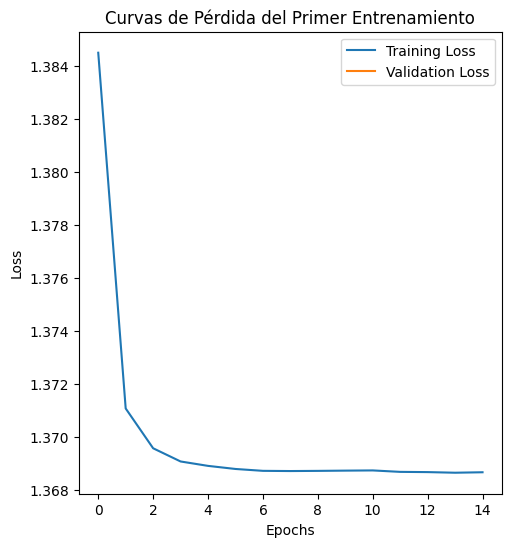

In [19]:
loss = history.history['loss']
val = history.history['val_loss']
# Crear el gráfico para el primer entrenamiento
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val, label='Validation Loss')
plt.title('Curvas de Pérdida del Primer Entrenamiento')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()



plt.show()


In [20]:
from tensorflow.keras.models import load_model
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, auc, f1_score
import matplotlib.pyplot as plt

try:
    # Asumiendo que 'model' y 'test_dataset' ya están definidos y cargados
    predictions = model.predict(test_dataset)
    predicted_classes = (predictions > 0.05).astype(int)

    true_classes = np.concatenate([y for x, y in test_dataset], axis=0)

    cm = confusion_matrix(true_classes, predicted_classes)

    fpr, tpr, thresholds = roc_curve(true_classes, predictions)
    roc_auc = auc(fpr, tpr)

    # Calcular el F1 Score para cada posible umbral
    f1_scores = [f1_score(true_classes, predictions > thresh, average='macro') for thresh in thresholds]

    # Encontrar el índice del máximo F1 Score
    max_f1_index = np.argmax(f1_scores)
    max_f1 = f1_scores[max_f1_index]
    optimal_thresh = thresholds[max_f1_index]

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.scatter(fpr[max_f1_index], tpr[max_f1_index], marker='o', color='red', label='Optimal threshold (F1 = %0.2f)' % max_f1)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    # Mostrando la matriz de confusión y el umbral óptimo
    print("Matriz de Confusión:")
    print(cm)
    print("Umbral óptimo para maximizar el F1 Score Macro:", optimal_thresh)
    print("F1 Score Macro máximo:", max_f1)

except Exception as e:
    print("Error:", e)


79/79 [==============================] - 35s 431ms/step
Error: Input contains NaN.
